In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from torsionfit import parameters
from parmed.charmm import CharmmParameterSet
import torsionfit.parameters as par
import numpy as np
from edward.models import Normal, Categorical, Uniform
import tensorflow as tf
from simtk import unit
import copy

In [2]:
# Only dihedral energy to compare to np and tf energy evaluation
# Turn off everything besides dihedrals
param_dih = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')
structure_no_charge = '../structure/butane_charge_off.psf'
scan = 'MP2_torsion_scan/'
param_dih.bond_types[('CG321', 'CG331')].k=0
param_dih.bond_types[('CG321', 'CG321')].k=0
param_dih.bond_types[('CG331', 'HGA3')].k=0
param_dih.bond_types[('CG321', 'HGA2')].k=0

#param_dih.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
#param_dih.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
#param_dih.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
#param_dih.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
#param_dih.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
#param_dih.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
#param_dih.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
#param_dih.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
#param_dih.dihedral_types[('HGA2', 'CG321', 'CG321', 'CG331')][0].phi_k=0

param_dih.angle_types[('CG321', 'CG321', 'CG331')].k=0
param_dih.angle_types[('CG321', 'CG331', 'HGA3')].k=0
param_dih.angle_types[('CG321', 'CG331', 'HGA3')].k=0
param_dih.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_dih.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_dih.angle_types[('HGA2', 'CG321', 'CG331')].k=0
param_dih.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_dih.angle_types[('HGA2', 'CG321', 'CG321')].k=0
param_dih.angle_types[('CG321', 'CG321', 'HGA2')].k=0

param_dih.urey_bradley_types[('CG321', 'CG321', 'CG331')].k  = 0
param_dih.urey_bradley_types[('CG331', 'CG321', 'HGA2')].k = 0
param_dih.urey_bradley_types[('CG321', 'CG321', 'HGA2')].k = 0
param_dih.urey_bradley_types[('HGA3', 'CG331', 'CG321')].k = 0
param_dih.urey_bradley_types[('HGA3', 'CG331', 'HGA3')].k = 0
param_dih.urey_bradley_types[('HGA2', 'CG321', 'HGA2')].k = 0

param_dih.atom_types['CG331'].sigma_14 = 1.0
param_dih.atom_types['CG331'].rmin = 1.0
param_dih.atom_types['CG331'].rmin_14 = 1.0
param_dih.atom_types['CG331'].epsilon_14 = 0
param_dih.atom_types['CG331'].sigma=1.0
param_dih.atom_types['CG331'].epsilon = 0.0
param_dih.atom_types['CG321'].epsilon_14 = 0.0
param_dih.atom_types['CG321'].rmin_14 = 1.0
param_dih.atom_types['CG321'].sigma_14 = 1.0
param_dih.atom_types['CG321'].sigma=1.0
param_dih.atom_types['CG321'].epsilon = 0.0
param_dih.atom_types['HGA3'].epsilon_14 = 0.0
param_dih.atom_types['HGA3'].sigma = 1.0
param_dih.atom_types['HGA3'].epsilon = 0.0
param_dih.atom_types['HGA2'].epsilon_14 = 0.0
param_dih.atom_types['HGA2'].sigma = 1.0
param_dih.atom_types['HGA2'].epsilon = 0.0

no_charge = ScanSet.parse_psi4_out(scan, structure_no_charge, pattern='*.out2')
scan_dih = no_charge.remove_nonoptimized()
scan_dih.compute_energy(param_dih)

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.574.ge72ac95.dirty-py3.5.egg/torsionfit/database/qmdatabase.py:190: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 468, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/60/butane_60.out2 WARNING] In logfileparser.py, line 468, line not all dashes a

In [3]:
# Tensorflow interactive session
tf.InteractiveSession()
scan_dih.build_phis()
to_optimize = list(scan_dih.phis.keys())

In [4]:
# time and Test Tensorflow Fourier sum vs numpy

# Numpy
length = 0
to_optimize = list(scan_dih.phis.keys())
K_np = np.zeros((6, len(scan_dih.phis)))
n_np = np.array([1., 2., 3., 4., 5., 6.])
for i, t in enumerate(to_optimize):
    dih_param = param_dih.dihedral_types[t]
    for k in dih_param:
        m = k.per
        K_np[m-1][i] = k.phi_k*4.184
        if k.phase == 180.0:
            K_np[m-1][i] = -k.phi_k*4.184
    if scan_dih.phis[t].shape[-1] > length:
        length = scan_dih.phis[t].shape[-1]

K_tf = tf.constant(K_np, dtype=tf.float32)

n_np = np.array([1., 2., 3., 4., 5., 6.])
n_tf = tf.constant(n_np, dtype=tf.float32)

# phis for tf
phis = {}
for t in to_optimize:
    phis[t] = tf.constant(scan_dih.phis[t], shape=(36, scan_dih.phis[t].shape[-1], 1), dtype=tf.float32)

In [5]:
%%time
# Calculate Fourier sum numpy
Fourier_sum_np = np.zeros((36))
for i, t in enumerate(to_optimize):
    Fourier_sum_np +=(K_np[:, i][:, np.newaxis]*(1+np.cos((scan_dih.phis[t][:, np.newaxis]*n_np[:, np.newaxis])))).sum(1).sum(1)


CPU times: user 967 µs, sys: 664 µs, total: 1.63 ms
Wall time: 979 µs


In [6]:
%%time
# Calculate Fourier sum tensorflow
Fourier_sum_tf = tf.Variable(tf.zeros([36]))
tf.global_variables_initializer().run()
for i, t in enumerate(to_optimize):
    energy = tf.reduce_sum(tf.reduce_sum(K_tf[:,i]*(1+tf.cos(phis[t]*n_tf)), axis=1), axis=1)
    Fourier_sum_tf = tf.assign_add(ref=Fourier_sum_tf, value=energy, use_locking=True)

CPU times: user 234 ms, sys: 3.11 ms, total: 237 ms
Wall time: 236 ms


Evaluating dihedral energy in tensorflow is 2 orders of magnitude slower. I'm not sure why.

In [7]:
sum_tf = Fourier_sum_tf.eval()

In [8]:
print(sum_tf)

[ 13.45736504   9.2181263    6.0344696    3.1636796    1.21723783
   0.25736979   0.68414032   2.82384443   6.12481594   9.60699463
  12.27157021  13.21215439  12.0612011    9.33106041   6.02901173
   3.04043794   0.89973032   0.15604049   0.90040529   2.9931488
   6.03152084   9.36508942  12.06383324  13.21228218  12.27484322
   9.60490799   6.12298393   2.82190156   0.6835717    0.25723138
   1.21742368   3.19276524   6.03352356   9.25861073  12.23752022
  13.45736408]


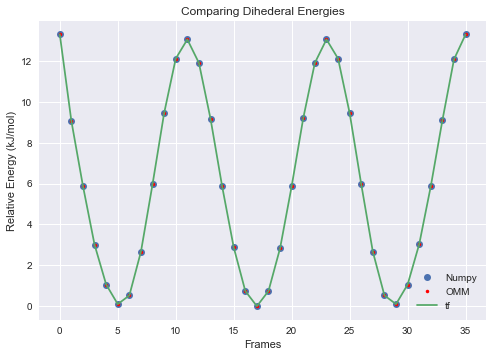

In [12]:
# Plot all energies
plt.plot(Fourier_sum_np-min(Fourier_sum_np), 'o', label='Numpy')
plt.plot(scan_dih.mm_energy, '.', color='red',label='OMM')
plt.plot(sum_tf-min(sum_tf), label='tf')
plt.legend()
plt.title('Comparing Dihederal Energies')
plt.ylabel('Relative Energy (kJ/mol)')
plt.xlabel('Frames');

In [4]:
# Dihedrals will be fit to residuals - QM - MM(without dihedrals)
residual_data = copy.deepcopy(scan_no_dih.delta_energy.value_in_unit(unit=unit.kilojoule_per_mole))

In [16]:
# Tensorflow interactive session
tf.InteractiveSession()

# Create priors for parameters
# Jeffery's priors on sigma
log_sgima_K = Uniform(low=tf.ones(len(to_optimize))*-4.6052, high=tf.ones(len(to_optimize))*3.453)
sigma_k = tf.map_fn(lambda x: tf.exp(x), log_sgima_K)
K = Normal(loc=tf.zeros((6, len(to_optimize))), scale=sigma_k)

p = tf.ones(64)*1/64
mult_bitstrings = {}
phis = {}
#K = {}
n = tf.constant([1., 2., 3., 4., 5., 6.], shape=(1,6), dtype=tf.float32)
# Catagorical for n
to_optimize = []
for t in scan_dih.phis:
    name = t[0] + '_' + t[1] + '_' + t[2] + '_' + t[3]
    to_optimize.append(name)
    phis[name] = tf.constant(scan_dih.phis[t], shape=(36, scan_dih.phis[t].shape[-1], 1), dtype=tf.float32)
    #K[t] = Normal(loc=tf.zeros(6), scale=1)
    name = name + '_mult_bitstring'
    mult_bitstrings[name] = Categorical(probs=p)
    
